In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.transform import Rotation as R

In [2]:
# READ THE CAMERA MATRIX INTRINSIC AND THE DISTORTION COEFFICIENTS
int_mat = pd.read_csv("cam.csv",header=None).values
dist = pd.read_csv("dist.csv",header=None).values

Number of markers visible are: 1


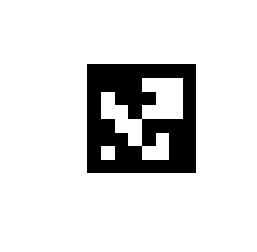

In [4]:
# LOAD MARKER IMAGE
frame = cv2.imread("Images/marker0.png",1)
# ADD BORDER (WHITE)
frame = cv2.copyMakeBorder(frame,100,100,100,100,cv2.BORDER_CONSTANT,value=[255,255,255])

dictionary = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)
parameters =  cv2.aruco.DetectorParameters_create() 

# DETECT MARKERS IN THE IMAGE
markerCorners, markerIds, rejectedCandidates = cv2.aruco.detectMarkers(frame, dictionary, parameters=parameters)
num_markers = len(markerCorners) # NUMBER OF MARKERS DETECTED
print("Number of markers visible are:",num_markers)

plt.rc_context({'axes.edgecolor':'white','xtick.color':'white','ytick.color':'white'})
# ABOVE LINE MAKES AXIS COLOR WHITE IN PLOT.COMMENT IT IF U HAVE AWHITE BACKGROUND
plt.imshow(frame)
plt.show()

In [5]:
axes = frame
for i in range(num_markers):
    rvec,tvec,_ = cv2.aruco.estimatePoseSingleMarkers(markerCorners[i],5,cameraMatrix=int_mat,distCoeffs=dist)
    cv2.aruco.drawAxis(axes,int_mat,dist,rvec,tvec,1)
cv2.imshow("MARKER AXES", axes) 
cv2.waitKey(0)  
cv2.destroyAllWindows()

In [12]:
marker_ids = frame
font = cv2.FONT_HERSHEY_SIMPLEX 
org = (50, 50) 
fontScale = 1
color = (255, 0, 0) 
thickness = 2
for i in range(num_markers):
    [x,y] = np.mean(markerCorners[i][0],axis=0) 
    marker_ids = cv2.putText(marker_ids,str(markerIds[i]),(x,y), font,  
                       fontScale, color, thickness, cv2.LINE_AA) 
cv2.imshow("marker_ids", marker_ids) 
cv2.waitKey(0)  
cv2.destroyAllWindows()

In [13]:
# DETERMINE ANGLE COORDINATES FOR A CONTINIOUS VIDEO

vid = cv2.VideoCapture(2) # SELECT PROPER VIDEO SOURCE 
while(True): 
    ret, frame = vid.read() 
    markerCorners, markerIds, rejectedCandidates = cv2.aruco.detectMarkers(frame, dictionary, parameters=parameters)
    num_markers = len(markerCorners)
    # DRAW AXIS FOR ALL MARKERS
    for i in range(num_markers):
        rvec,tvec,_ = cv2.aruco.estimatePoseSingleMarkers(markerCorners[i],5,cameraMatrix=int_mat,distCoeffs=dist)
        cv2.aruco.drawAxis(frame,int_mat,dist,rvec,tvec,1)
    #DETERMINE ROTATION ANGLES FOR LAST MARKER
    rot = cv2.Rodrigues(rvec)
    r = R.from_matrix(rot[0])
    print(r.as_euler('xyz', degrees=True),end="\r")
    
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break  
vid.release() 
cv2.destroyAllWindows() 

In [119]:
frame = cv2.imread("Images/marker0.png",1)
frame = cv2.copyMakeBorder(frame,100,100,100,100,cv2.BORDER_CONSTANT,value=[255,255,255])
f = []
f.append(frame)
f.append(cv2.rotate(frame, cv2.cv2.ROTATE_90_CLOCKWISE))
f.append(cv2.rotate(frame, cv2.cv2.ROTATE_180))
f.append(cv2.rotate(frame, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE))

for i in range(4):
    markerCorners, markerIds, rejectedCandidates = cv2.aruco.detectMarkers(f[i], dictionary, parameters=parameters) 
    rvec,tvec,_ = cv2.aruco.estimatePoseSingleMarkers(markerCorners,.5,cameraMatrix=int_mat,distCoeffs=dist)
    #cv2.aruco.drawAxis(f[i],int_mat,dist,rvec,tvec,1)
    rot = cv2.Rodrigues(rvec)
    r = R.from_matrix(rot[0])
    cv2.imshow("marker_ids", f[i]) 
    cv2.waitKey(0)  
    cv2.destroyAllWindows()
    print(r.as_euler('xyz', degrees=True))